<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:80px;background-color:#6495ED;overflow:hidden;font-weight:800">Mental Health Diagnosis</div>

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-diagnosis-and-treatment-monitoring/mental_health_diagnosis_treatment_.csv


## <b><div style='padding:15px;background-color:#6495ED;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**The Mental Health Diagnosis and Treatment Monitoring dataset contains 500 rows representing real-world mental health diagnoses, treatment plans, and outcomes. It includes patient demographics, symptom severity, medication, therapy types, and progress tracking. This dataset is synthetic and created for research and analysis purposes.**

## <b><div style='padding:15px;background-color:#6495ED;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Libraries</div></b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#6495ED;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/mental-health-diagnosis-and-treatment-monitoring/mental_health_diagnosis_treatment_.csv')

In [4]:
df.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


## <b><div style='padding:15px;background-color:#6495ED;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (500, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Patient ID,int64,0,0.0,0,500,500,1.0,500.0,250.5,144.481833,1,2,3
Age,int64,0,0.0,0,43,500,18.0,60.0,38.708,12.712433,43,40,55
Gender,object,0,0.0,0,2,500,NaN,NaN,NaN,NaN,Female,Female,Female
Diagnosis,object,0,0.0,0,4,500,NaN,NaN,NaN,NaN,Major Depressive Disorder,Major Depressive Disorder,Major Depressive Disorder
Symptom Severity (1-10),int64,0,0.0,0,6,500,5.0,10.0,7.478,1.706265,10,9,6
Mood Score (1-10),int64,0,0.0,0,6,500,3.0,8.0,5.482,1.707486,5,5,3
Sleep Quality (1-10),int64,0,0.0,0,6,500,4.0,9.0,6.472,1.668167,8,4,4
Physical Activity (hrs/week),int64,0,0.0,0,10,500,1.0,10.0,5.216,2.829374,5,7,3
Medication,object,0,0.0,0,6,500,NaN,NaN,NaN,NaN,Mood Stabilizers,Antipsychotics,SSRIs
Therapy Type,object,0,0.0,0,4,500,NaN,NaN,NaN,NaN,Interpersonal Therapy,Interpersonal Therapy,Mindfulness-Based Therapy


<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#6495ED;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>No Missing and no Duplicates data.</div>

## <b><div style='padding:15px;background-color:#6495ED;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  Exploratory Data Analysis - EDA</div></b>

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 500
Variables: 17
cat_cols: 12
num_cols: 4
cat_but_car: 1
num_but_cat: 6


### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#7A7A7A'> Categorical Columns</span></b>  

        Gender  Ratio
Gender               
Male       266   53.2
Female     234   46.8


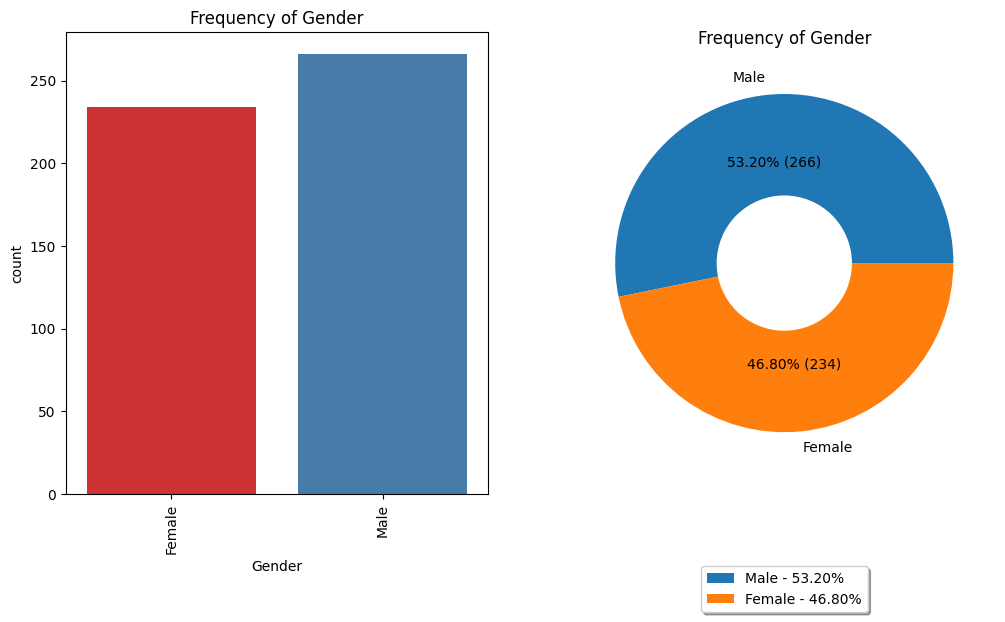

                           Diagnosis  Ratio
Diagnosis                                  
Generalized Anxiety              135   27.0
Major Depressive Disorder        125   25.0
Bipolar Disorder                 124   24.8
Panic Disorder                   116   23.2


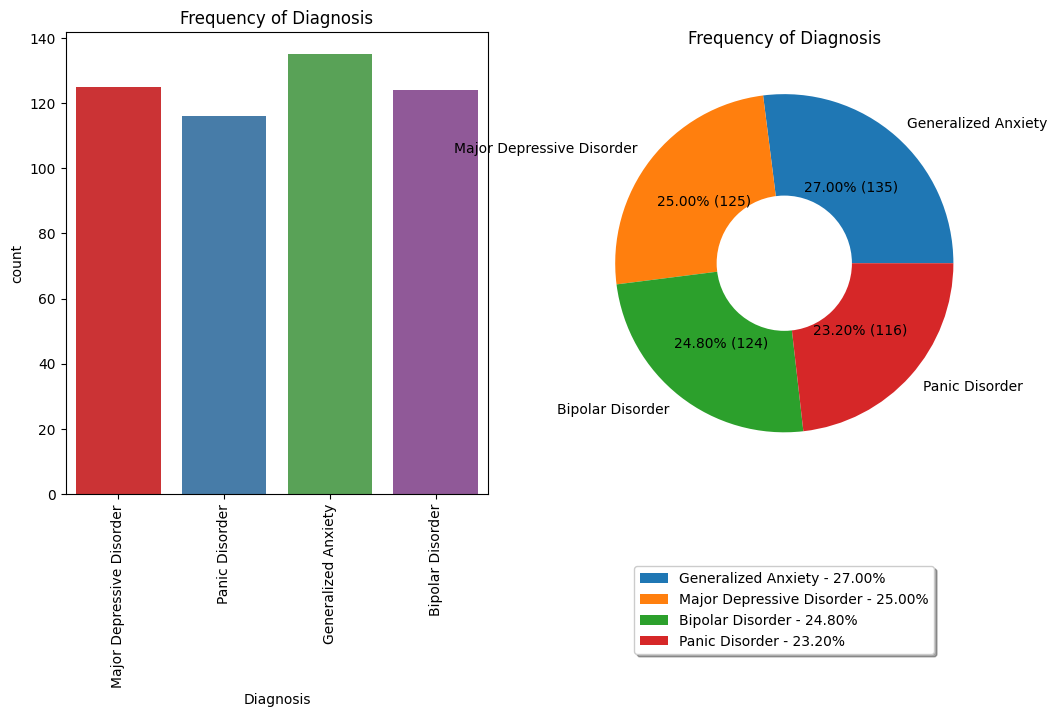

                  Medication  Ratio
Medication                         
Benzodiazepines           90   18.0
SSRIs                     89   17.8
Mood Stabilizers          87   17.4
Antipsychotics            87   17.4
Antidepressants           76   15.2
Anxiolytics               71   14.2


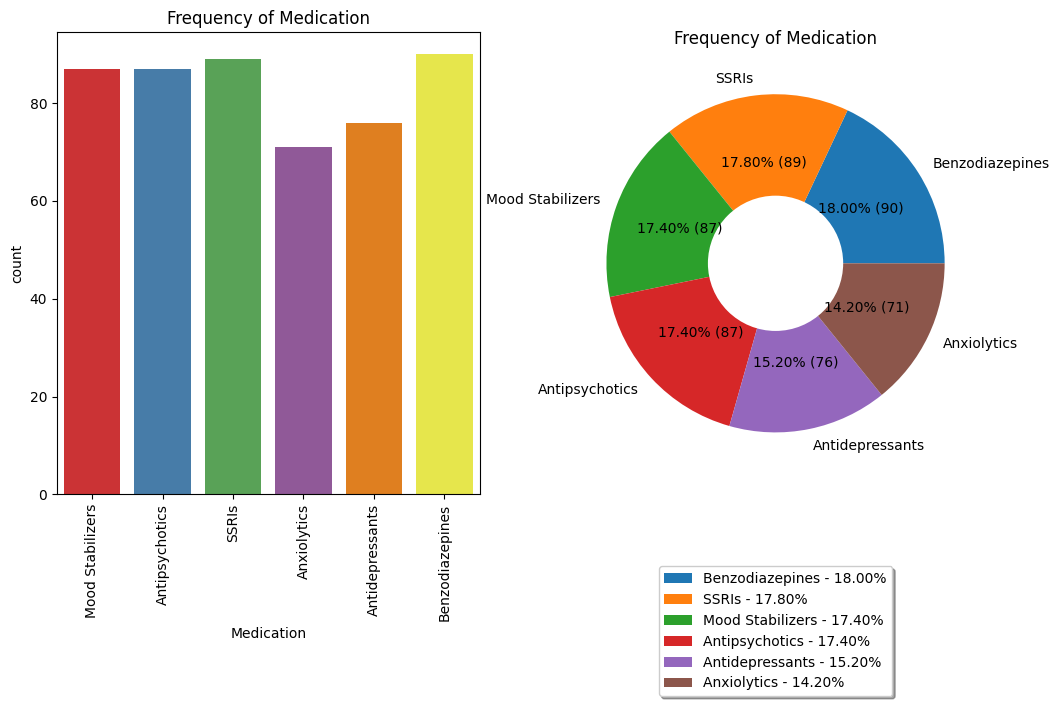

                                Therapy Type  Ratio
Therapy Type                                       
Mindfulness-Based Therapy                130   26.0
Dialectical Behavioral Therapy           129   25.8
Interpersonal Therapy                    124   24.8
Cognitive Behavioral Therapy             117   23.4


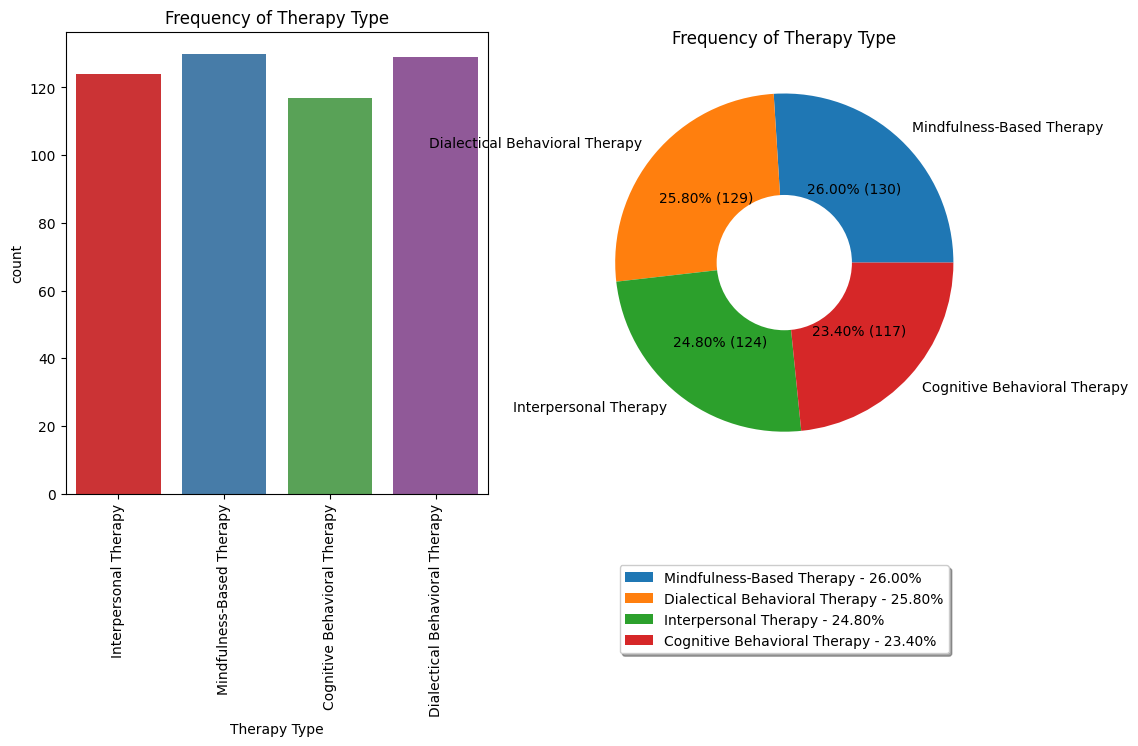

              Outcome  Ratio
Outcome                     
Deteriorated      171   34.2
Improved          170   34.0
No Change         159   31.8


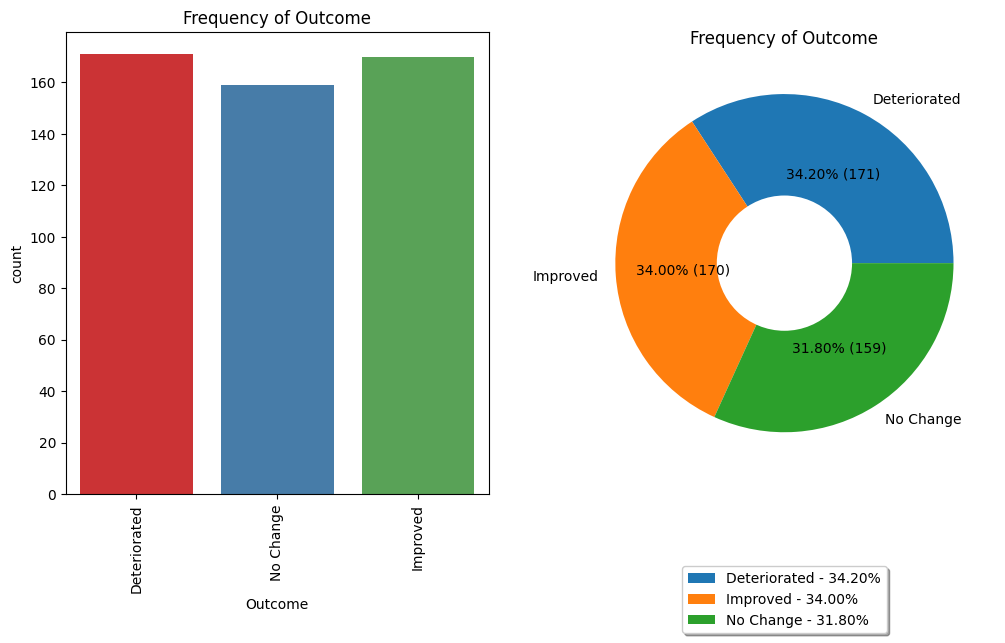

                             AI-Detected Emotional State  Ratio
AI-Detected Emotional State                                    
Anxious                                              102   20.4
Neutral                                               87   17.4
Excited                                               85   17.0
Stressed                                              79   15.8
Happy                                                 78   15.6
Depressed                                             69   13.8


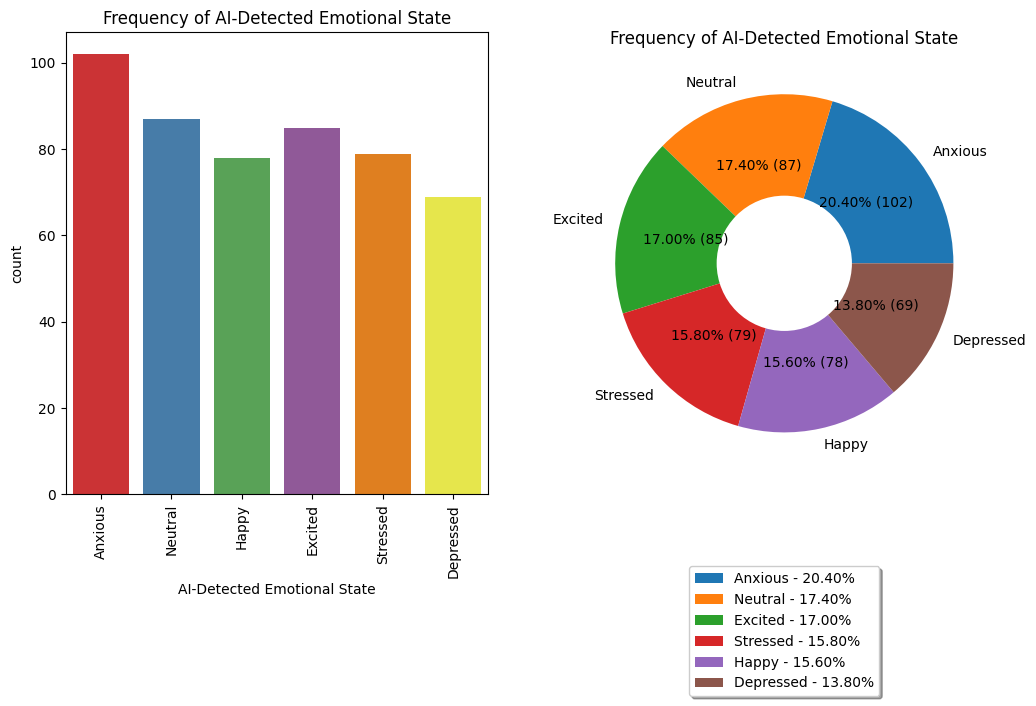

                         Symptom Severity (1-10)  Ratio
Symptom Severity (1-10)                                
8                                             93   18.6
5                                             87   17.4
10                                            81   16.2
6                                             81   16.2
9                                             79   15.8
7                                             79   15.8


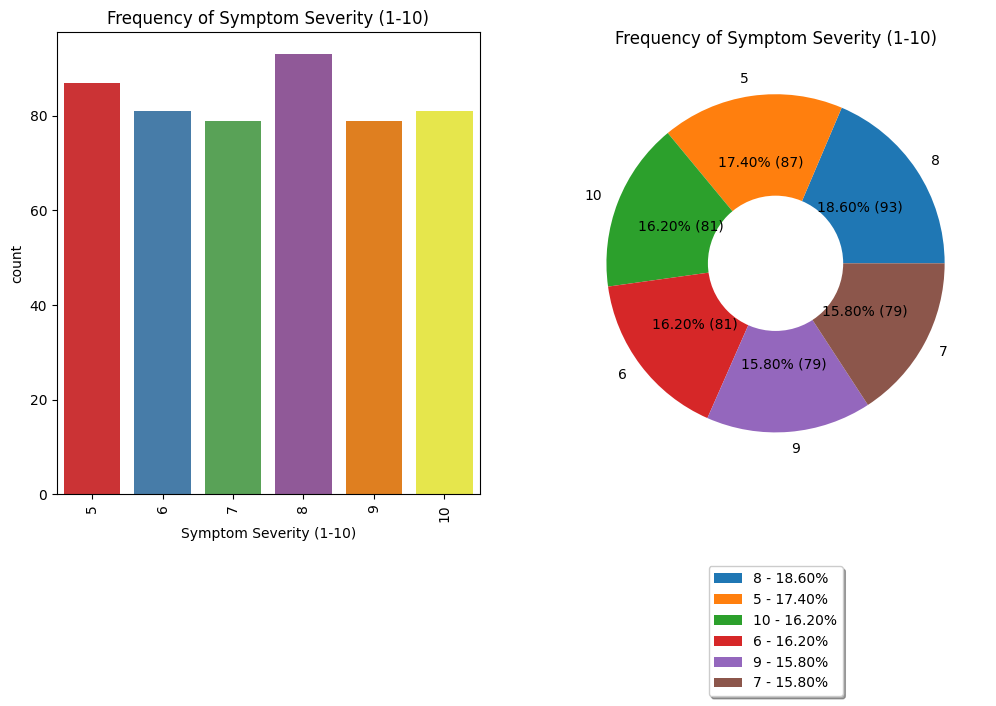

                   Mood Score (1-10)  Ratio
Mood Score (1-10)                          
5                                 89   17.8
6                                 88   17.6
3                                 86   17.2
8                                 85   17.0
4                                 78   15.6
7                                 74   14.8


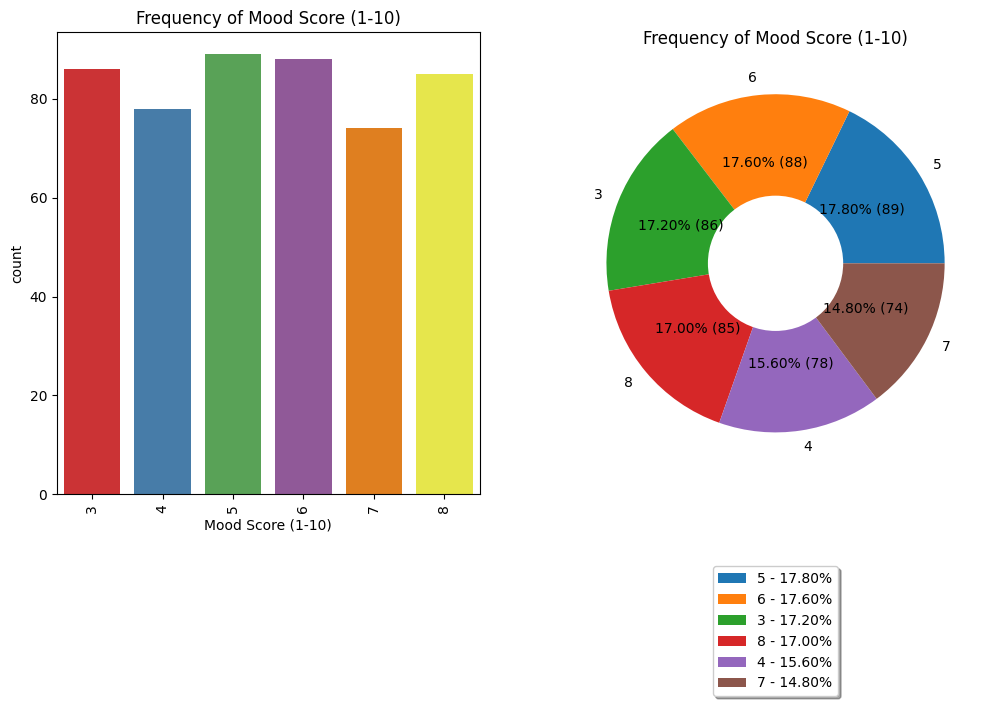

                      Sleep Quality (1-10)  Ratio
Sleep Quality (1-10)                             
6                                       98   19.6
7                                       86   17.2
4                                       80   16.0
5                                       80   16.0
8                                       78   15.6
9                                       78   15.6


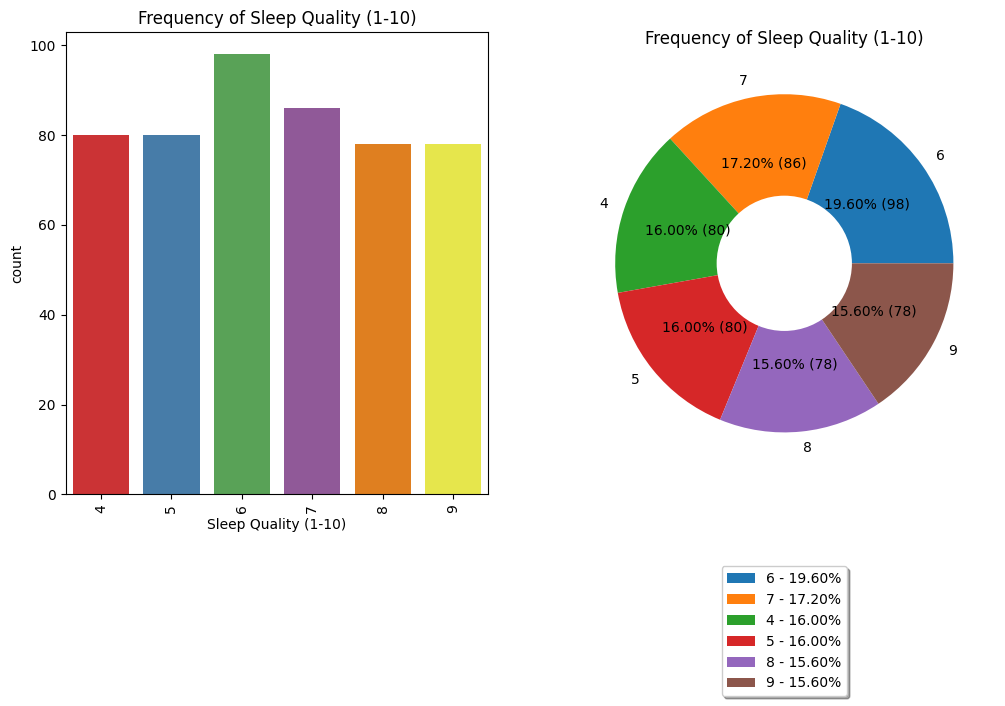

                            Treatment Duration (weeks)  Ratio
Treatment Duration (weeks)                                   
12                                                  69   13.8
14                                                  64   12.8
9                                                   62   12.4
13                                                  58   11.6
11                                                  57   11.4
15                                                  54   10.8
10                                                  51   10.2
16                                                  49    9.8
8                                                   36    7.2


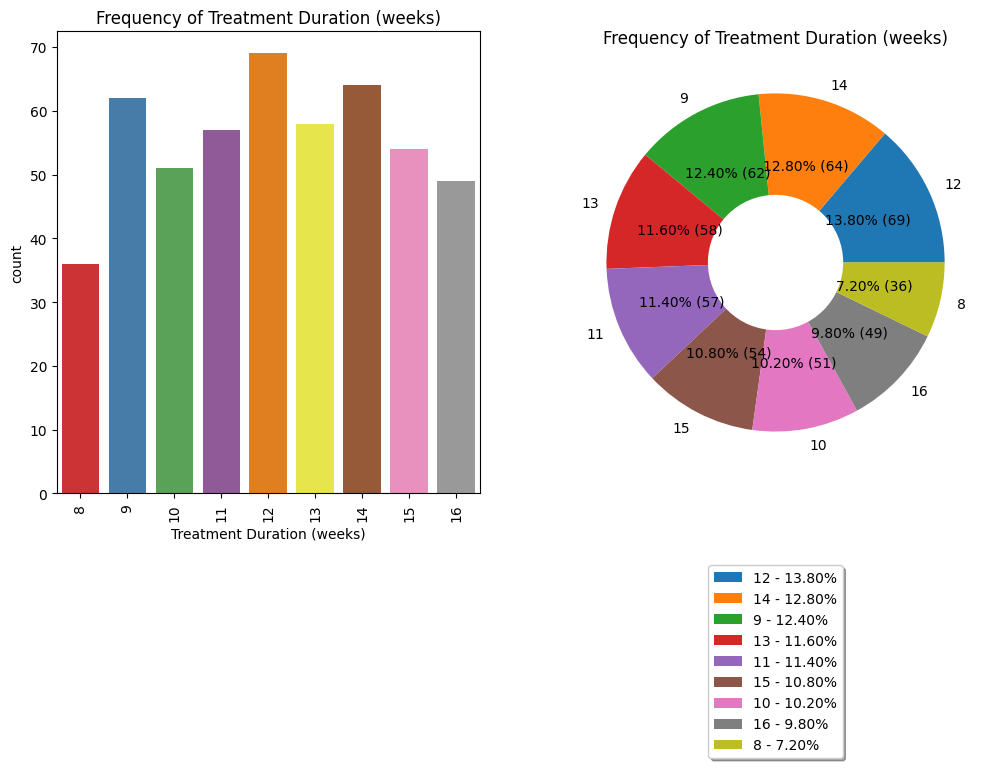

                     Stress Level (1-10)  Ratio
Stress Level (1-10)                            
9                                     91   18.2
8                                     85   17.0
10                                    83   16.6
5                                     82   16.4
6                                     81   16.2
7                                     78   15.6


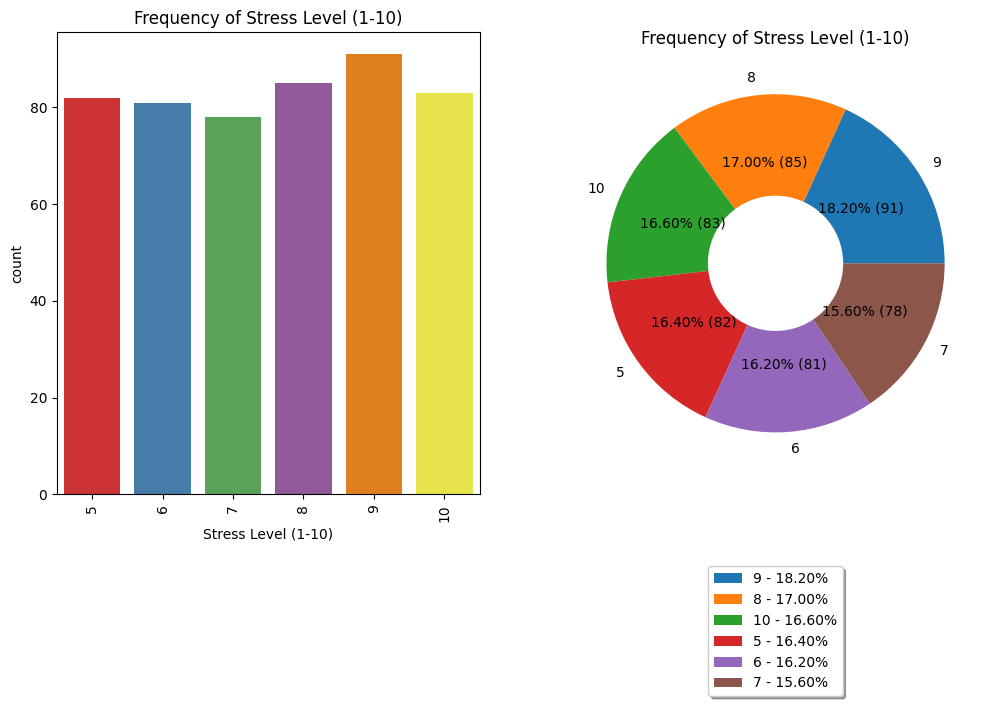

                           Treatment Progress (1-10)  Ratio
Treatment Progress (1-10)                                  
8                                                 94   18.8
5                                                 91   18.2
10                                                85   17.0
6                                                 85   17.0
7                                                 77   15.4
9                                                 68   13.6


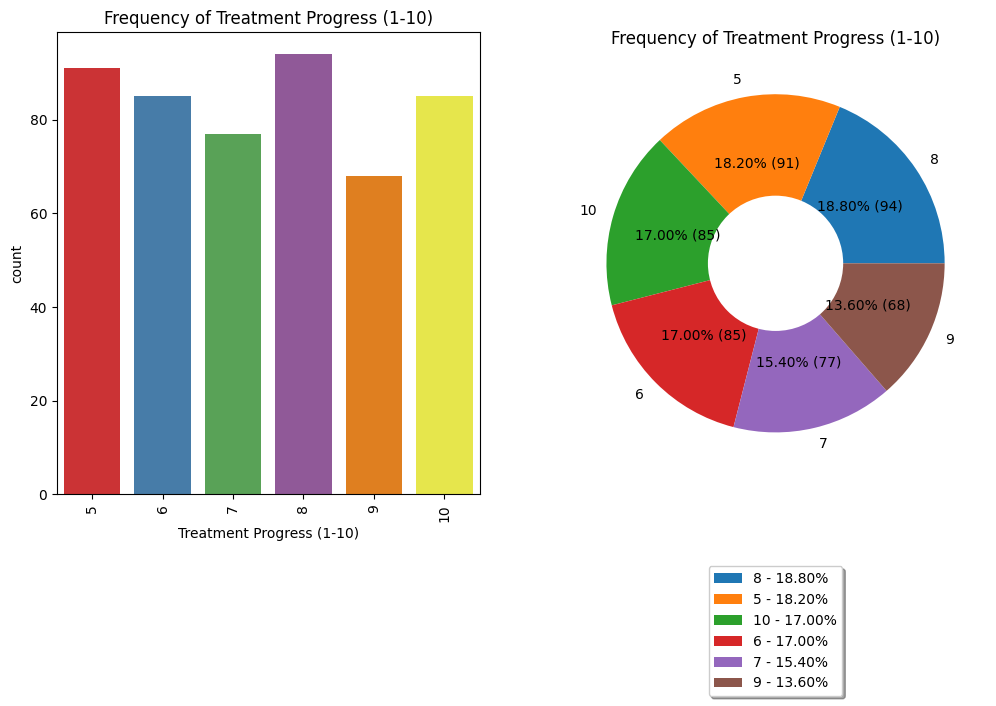

In [7]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe, palette = "Set1")
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        hole = plt.Circle((0, 0), 0.40, facecolor='white')
        plt.gcf().gca().add_artist(hole)        
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#7A7A7A'> Numerical Columns</span></b>  

Patient ID


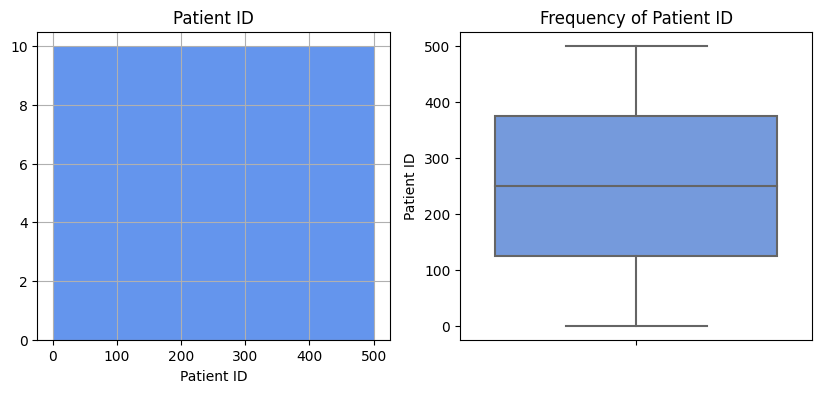

______________________________________________________

Age


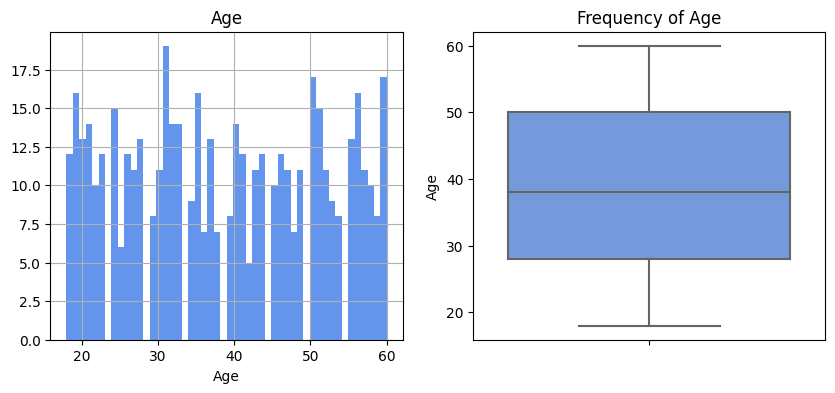

______________________________________________________

Physical Activity (hrs/week)


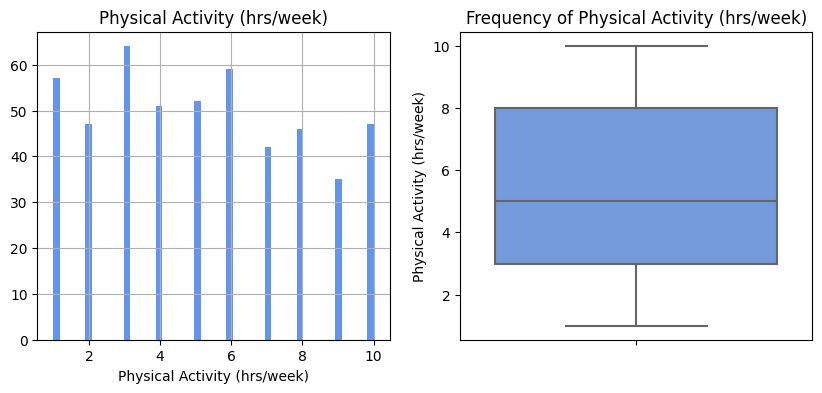

______________________________________________________

Adherence to Treatment (%)


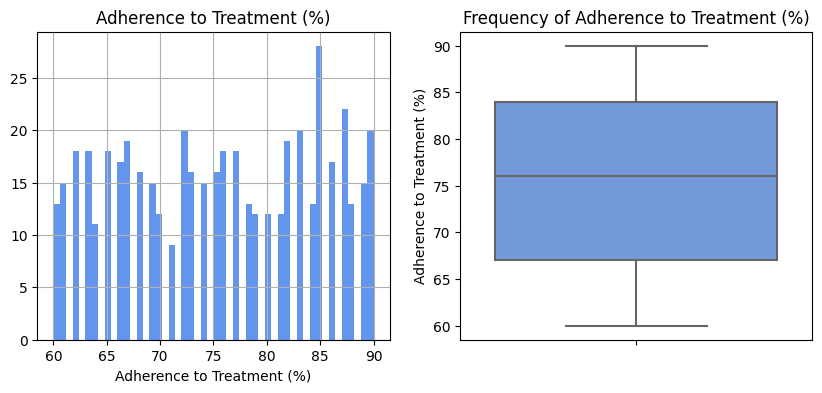

______________________________________________________



In [8]:
def num_summary(dataframe, numerical_col, plot=False):

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50, color = "#6495ED")
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe, color = "#6495ED")
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)
            plt.show(block=True)      

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#7A7A7A'> Outcome</span></b>  

In [9]:
colors = ["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7"]

In [10]:
cols = ['Age','Physical Activity (hrs/week)',
        'Adherence to Treatment (%)', 'Symptom Severity (1-10)',
        'Mood Score (1-10)', 'Sleep Quality (1-10)',
        'Treatment Duration (weeks)', 'Stress Level (1-10)',
        'Treatment Progress (1-10)']

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#6495ED;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Let's analyze the distribution of Outcome across features.</div>

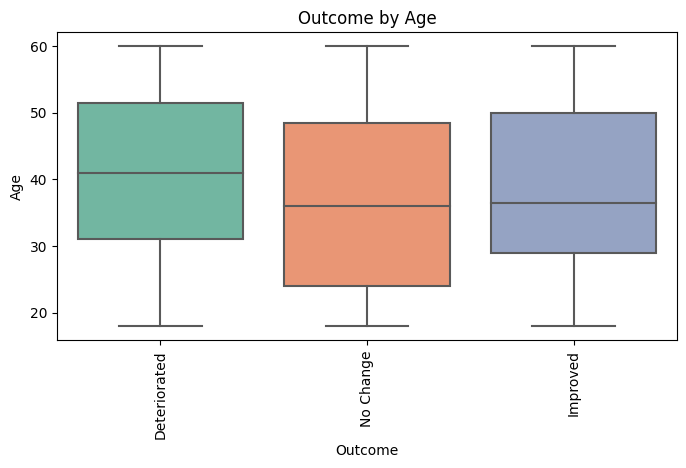

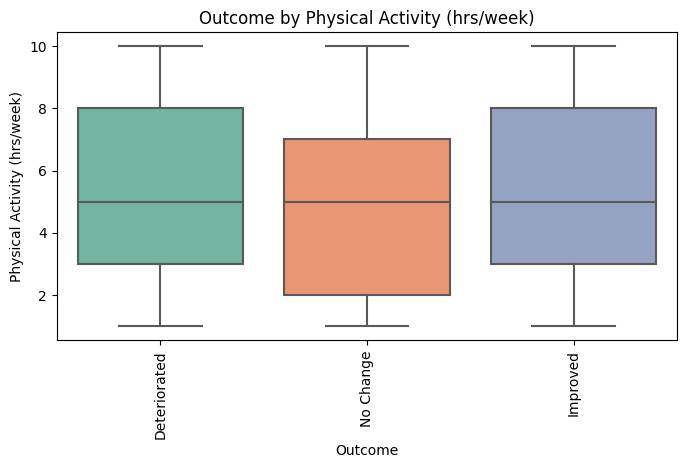

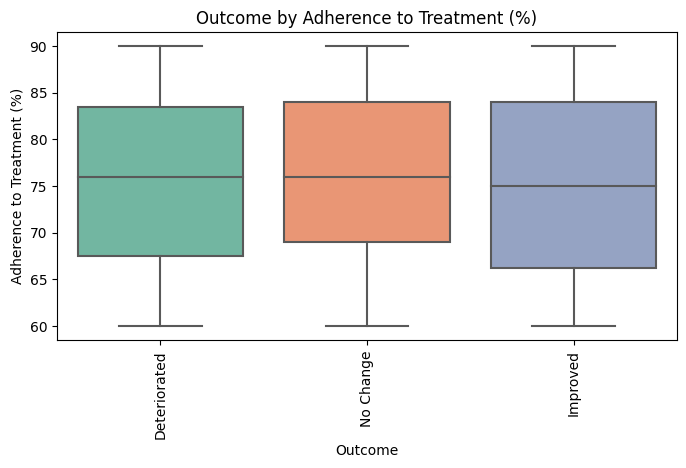

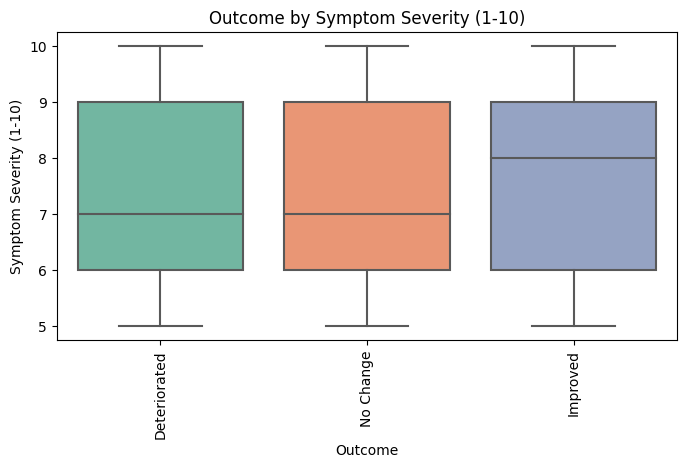

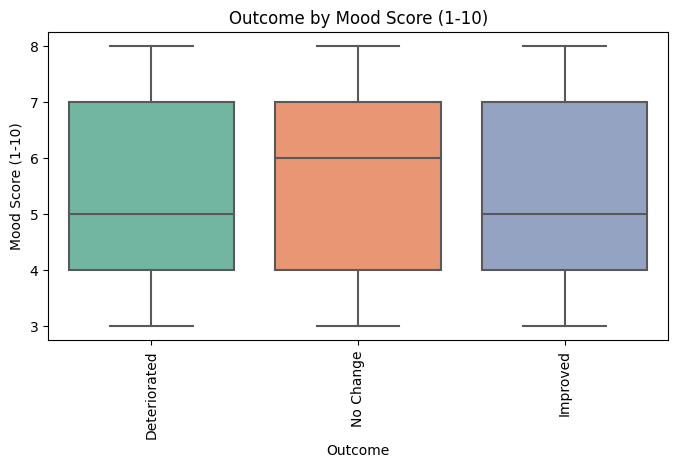

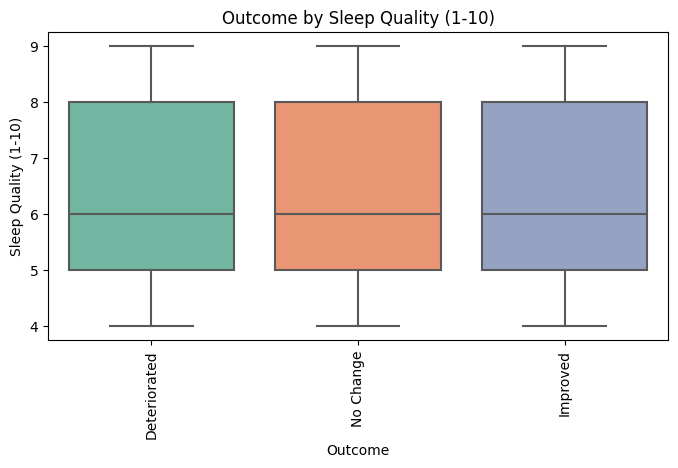

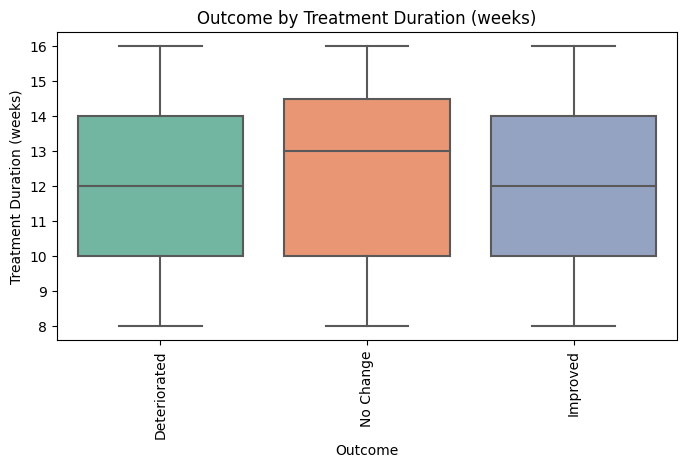

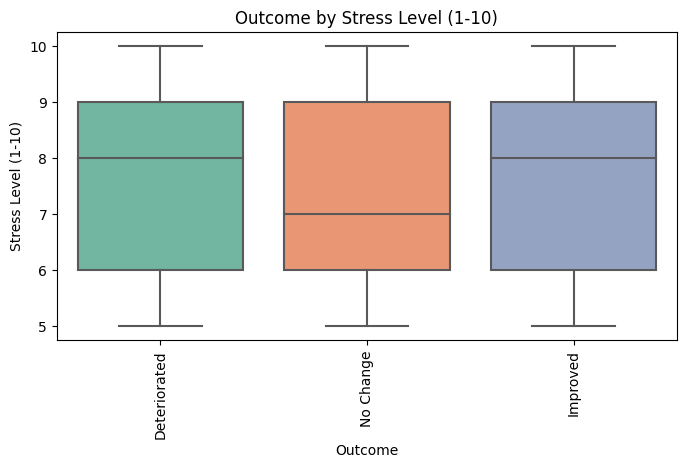

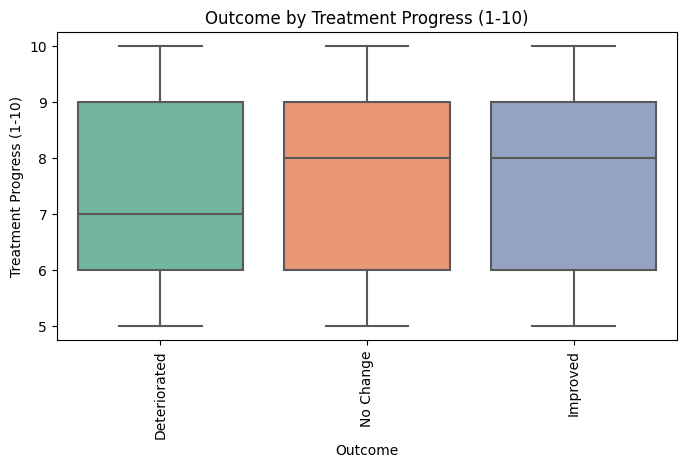

In [11]:
for i in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=i, data=df, palette='Set2')
    plt.title("Outcome by " + i)
    plt.xticks(rotation=90)
    plt.xlabel('Outcome')
    plt.ylabel(i)
    plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#6495ED;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Now let's check the Highest Average of Outcome according to the features.</div>

        Outcome        Age
0  Deteriorated  40.748538
1      Improved  38.270588
2     No Change  36.981132


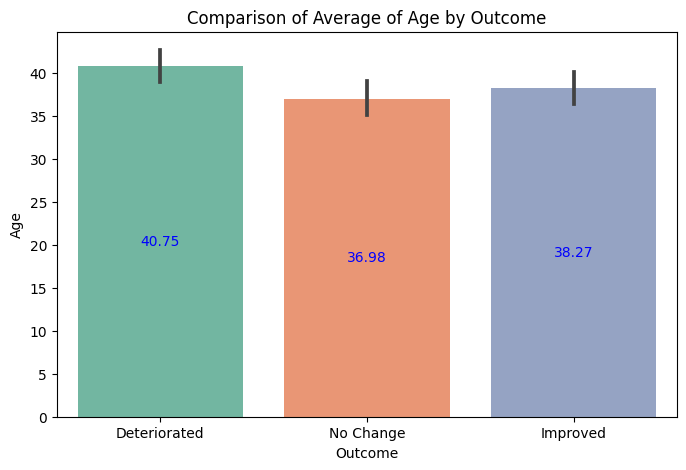

        Outcome  Physical Activity (hrs/week)
0  Deteriorated                      5.327485
1      Improved                      5.376471
2     No Change                      4.924528


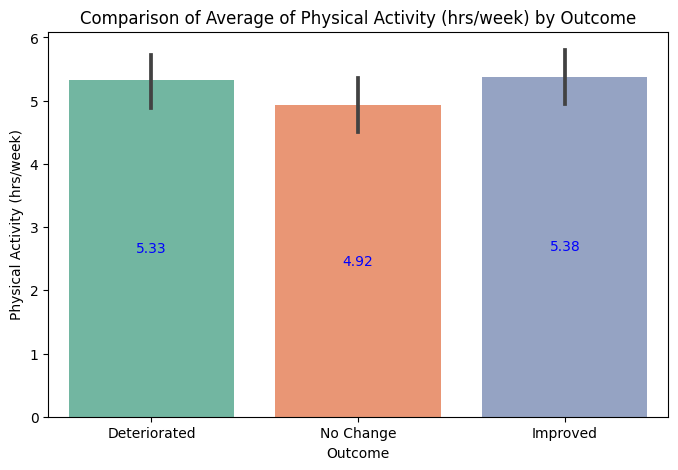

        Outcome  Adherence to Treatment (%)
0  Deteriorated                   75.397661
1      Improved                   75.017647
2     No Change                   75.981132


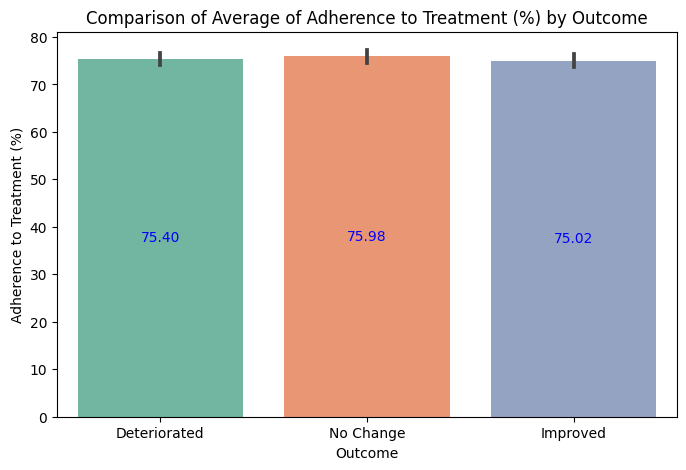

        Outcome  Symptom Severity (1-10)
0  Deteriorated                 7.461988
1      Improved                 7.523529
2     No Change                 7.446541


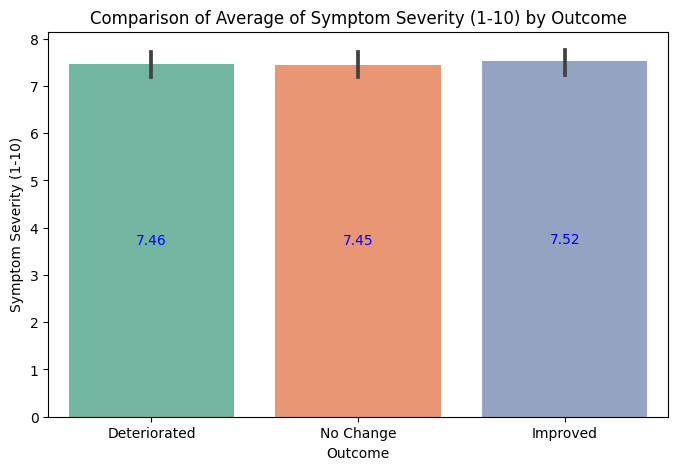

        Outcome  Mood Score (1-10)
0  Deteriorated           5.432749
1      Improved           5.441176
2     No Change           5.578616


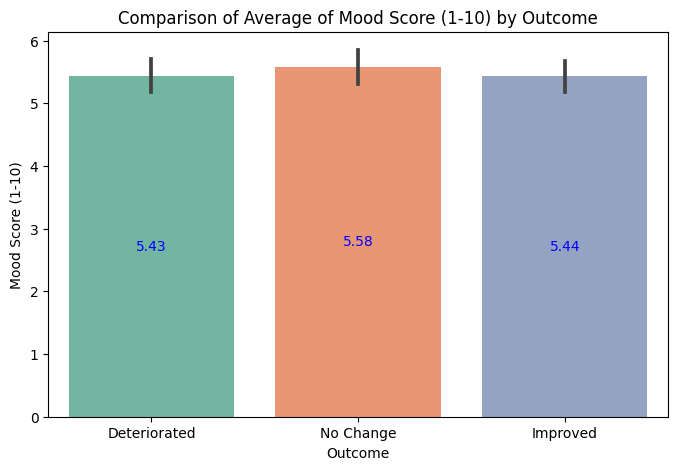

        Outcome  Sleep Quality (1-10)
0  Deteriorated              6.491228
1      Improved              6.476471
2     No Change              6.446541


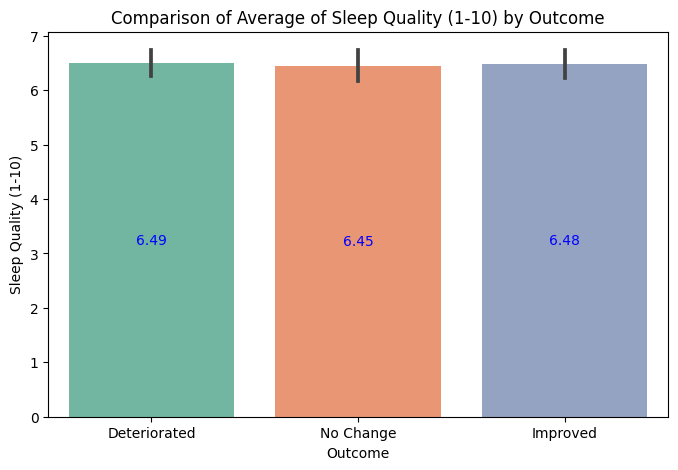

        Outcome  Treatment Duration (weeks)
0  Deteriorated                   11.941520
1      Improved                   12.129412
2     No Change                   12.270440


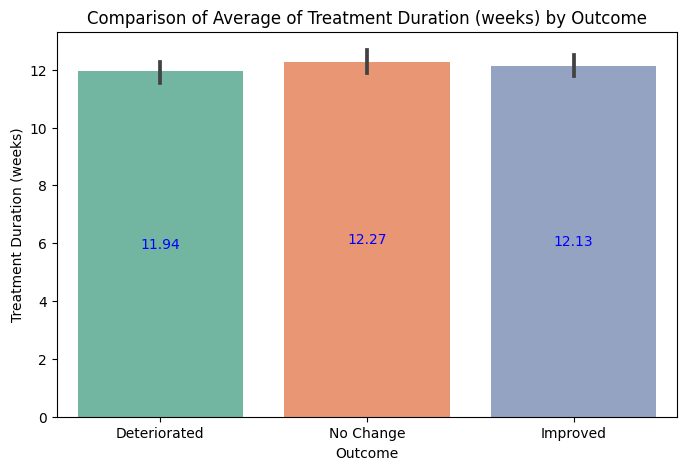

        Outcome  Stress Level (1-10)
0  Deteriorated             7.596491
1      Improved             7.552941
2     No Change             7.471698


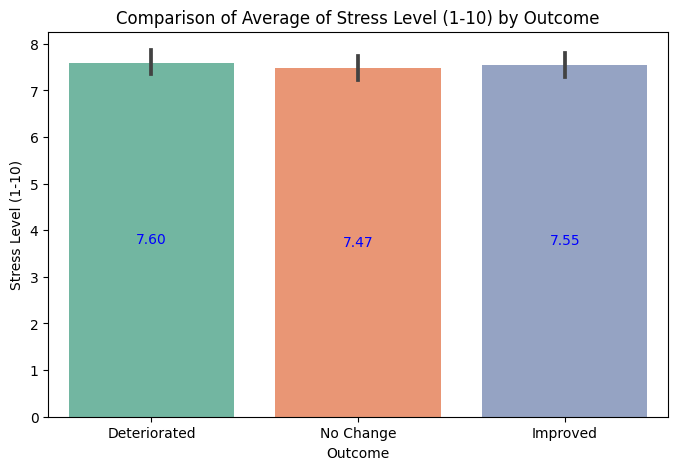

        Outcome  Treatment Progress (1-10)
0  Deteriorated                   7.222222
1      Improved                   7.523529
2     No Change                   7.572327


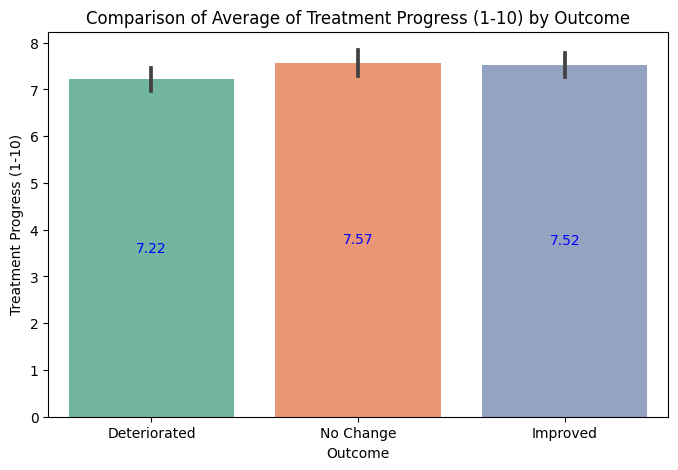

In [12]:
# Comparison of Average of Features by Outcome
def cat_summary(dataframe, col_name, plot=False):
    print(dataframe.groupby(['Outcome'])[[col_name]].mean().reset_index())

    if plot:
        fig, ax = plt.subplots(figsize=(8, 5))
        df_melted = dataframe.melt(id_vars=['Outcome'], value_vars=[col_name], 
                           var_name='Feature', value_name='Measurement')
        sns.barplot(x='Outcome', y='Measurement', data=df_melted, palette='Set2')
        plt.title('Comparison of Average of ' + col_name + ' by Outcome')
        ax.bar_label(ax.containers[0], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        plt.xlabel('Outcome')
        plt.ylabel(col_name)
        plt.show(block=True)
for col in cols:
    cat_summary(df, col, True)

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#6495ED;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Now let's check the comparison of Diagnosis for Features by Outcome</div>

         Outcome                  Diagnosis        Age
0   Deteriorated           Bipolar Disorder  39.804348
1   Deteriorated        Generalized Anxiety  44.675676
2   Deteriorated  Major Depressive Disorder  41.295455
3   Deteriorated             Panic Disorder  37.886364
4       Improved           Bipolar Disorder  40.340909
5       Improved        Generalized Anxiety  38.037736
6       Improved  Major Depressive Disorder  37.000000
7       Improved             Panic Disorder  37.341463
8      No Change           Bipolar Disorder  34.852941
9      No Change        Generalized Anxiety  39.466667
10     No Change  Major Depressive Disorder  37.551020
11     No Change             Panic Disorder  34.806452


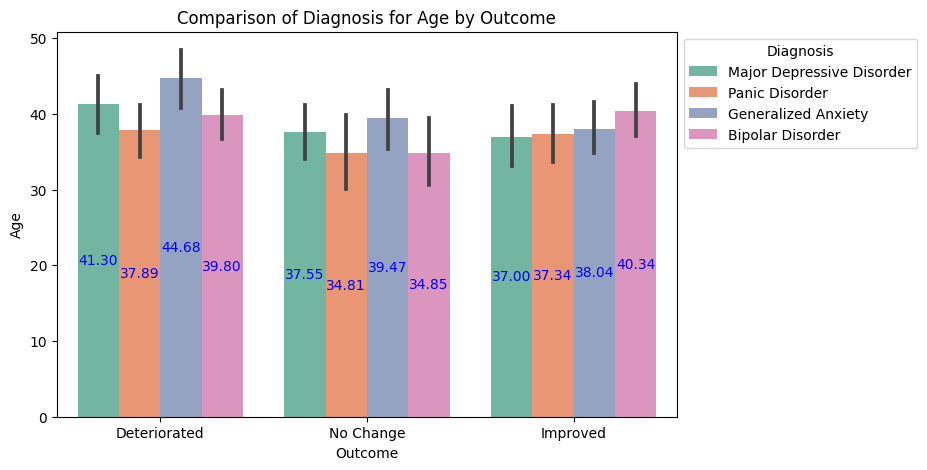

         Outcome                  Diagnosis  Physical Activity (hrs/week)
0   Deteriorated           Bipolar Disorder                      5.565217
1   Deteriorated        Generalized Anxiety                      5.270270
2   Deteriorated  Major Depressive Disorder                      4.863636
3   Deteriorated             Panic Disorder                      5.590909
4       Improved           Bipolar Disorder                      5.272727
5       Improved        Generalized Anxiety                      5.283019
6       Improved  Major Depressive Disorder                      5.125000
7       Improved             Panic Disorder                      5.804878
8      No Change           Bipolar Disorder                      5.088235
9      No Change        Generalized Anxiety                      5.600000
10     No Change  Major Depressive Disorder                      4.489796
11     No Change             Panic Disorder                      4.451613


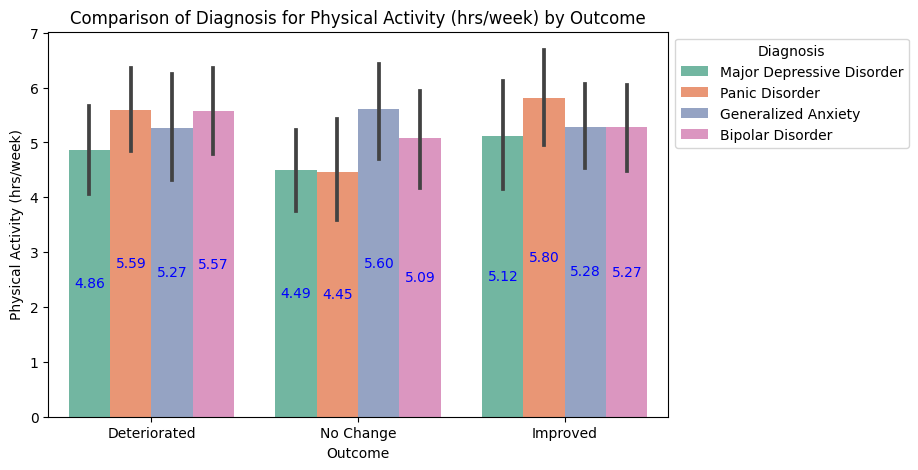

         Outcome                  Diagnosis  Adherence to Treatment (%)
0   Deteriorated           Bipolar Disorder                   77.847826
1   Deteriorated        Generalized Anxiety                   77.081081
2   Deteriorated  Major Depressive Disorder                   74.136364
3   Deteriorated             Panic Disorder                   72.681818
4       Improved           Bipolar Disorder                   73.340909
5       Improved        Generalized Anxiety                   75.735849
6       Improved  Major Depressive Disorder                   74.968750
7       Improved             Panic Disorder                   75.926829
8      No Change           Bipolar Disorder                   76.882353
9      No Change        Generalized Anxiety                   75.377778
10     No Change  Major Depressive Disorder                   75.591837
11     No Change             Panic Disorder                   76.483871


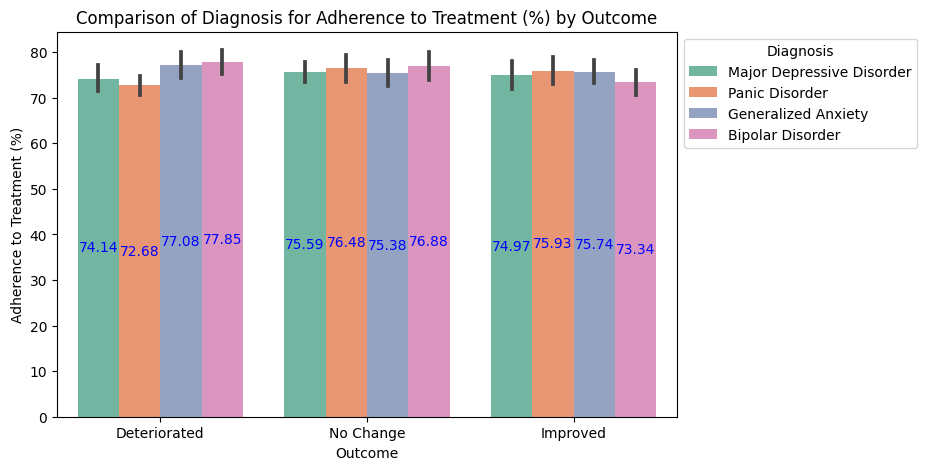

         Outcome                  Diagnosis  Symptom Severity (1-10)
0   Deteriorated           Bipolar Disorder                 7.456522
1   Deteriorated        Generalized Anxiety                 7.621622
2   Deteriorated  Major Depressive Disorder                 7.295455
3   Deteriorated             Panic Disorder                 7.500000
4       Improved           Bipolar Disorder                 7.659091
5       Improved        Generalized Anxiety                 7.754717
6       Improved  Major Depressive Disorder                 7.156250
7       Improved             Panic Disorder                 7.365854
8      No Change           Bipolar Disorder                 7.705882
9      No Change        Generalized Anxiety                 7.400000
10     No Change  Major Depressive Disorder                 7.551020
11     No Change             Panic Disorder                 7.064516


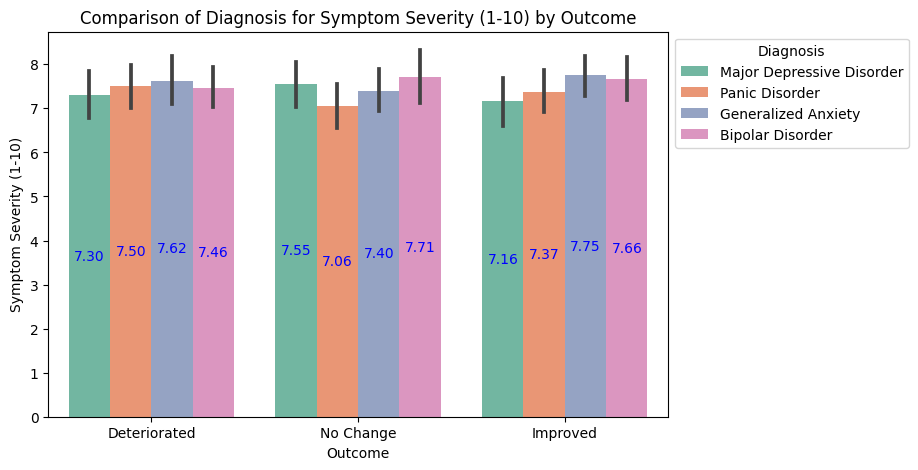

         Outcome                  Diagnosis  Mood Score (1-10)
0   Deteriorated           Bipolar Disorder           5.304348
1   Deteriorated        Generalized Anxiety           5.675676
2   Deteriorated  Major Depressive Disorder           5.090909
3   Deteriorated             Panic Disorder           5.704545
4       Improved           Bipolar Disorder           5.659091
5       Improved        Generalized Anxiety           5.188679
6       Improved  Major Depressive Disorder           5.375000
7       Improved             Panic Disorder           5.585366
8      No Change           Bipolar Disorder           5.705882
9      No Change        Generalized Anxiety           5.288889
10     No Change  Major Depressive Disorder           5.734694
11     No Change             Panic Disorder           5.612903


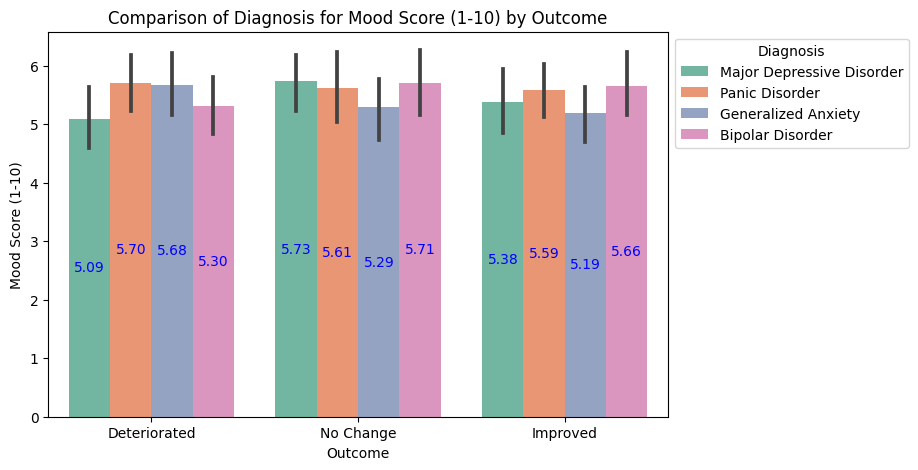

         Outcome                  Diagnosis  Sleep Quality (1-10)
0   Deteriorated           Bipolar Disorder              6.891304
1   Deteriorated        Generalized Anxiety              6.864865
2   Deteriorated  Major Depressive Disorder              6.181818
3   Deteriorated             Panic Disorder              6.068182
4       Improved           Bipolar Disorder              6.204545
5       Improved        Generalized Anxiety              6.528302
6       Improved  Major Depressive Disorder              6.250000
7       Improved             Panic Disorder              6.878049
8      No Change           Bipolar Disorder              6.735294
9      No Change        Generalized Anxiety              6.533333
10     No Change  Major Depressive Disorder              6.081633
11     No Change             Panic Disorder              6.580645


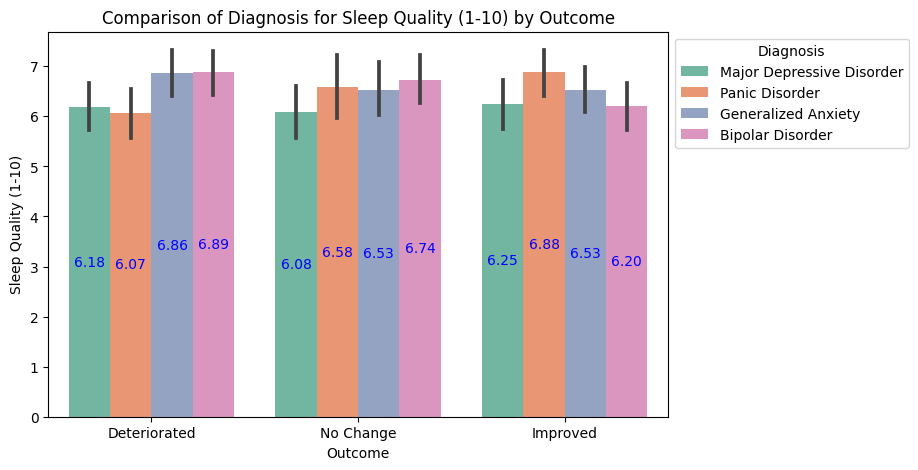

         Outcome                  Diagnosis  Treatment Duration (weeks)
0   Deteriorated           Bipolar Disorder                   12.043478
1   Deteriorated        Generalized Anxiety                   11.594595
2   Deteriorated  Major Depressive Disorder                   12.454545
3   Deteriorated             Panic Disorder                   11.613636
4       Improved           Bipolar Disorder                   12.000000
5       Improved        Generalized Anxiety                   11.962264
6       Improved  Major Depressive Disorder                   12.343750
7       Improved             Panic Disorder                   12.317073
8      No Change           Bipolar Disorder                   12.529412
9      No Change        Generalized Anxiety                   13.088889
10     No Change  Major Depressive Disorder                   11.408163
11     No Change             Panic Disorder                   12.161290


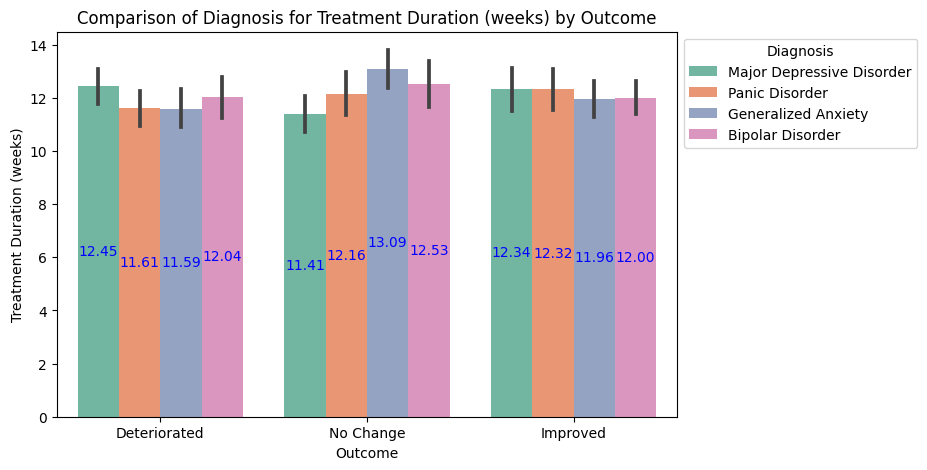

         Outcome                  Diagnosis  Stress Level (1-10)
0   Deteriorated           Bipolar Disorder             7.739130
1   Deteriorated        Generalized Anxiety             7.324324
2   Deteriorated  Major Depressive Disorder             7.704545
3   Deteriorated             Panic Disorder             7.568182
4       Improved           Bipolar Disorder             7.568182
5       Improved        Generalized Anxiety             7.566038
6       Improved  Major Depressive Disorder             7.312500
7       Improved             Panic Disorder             7.707317
8      No Change           Bipolar Disorder             7.411765
9      No Change        Generalized Anxiety             7.488889
10     No Change  Major Depressive Disorder             7.448980
11     No Change             Panic Disorder             7.548387


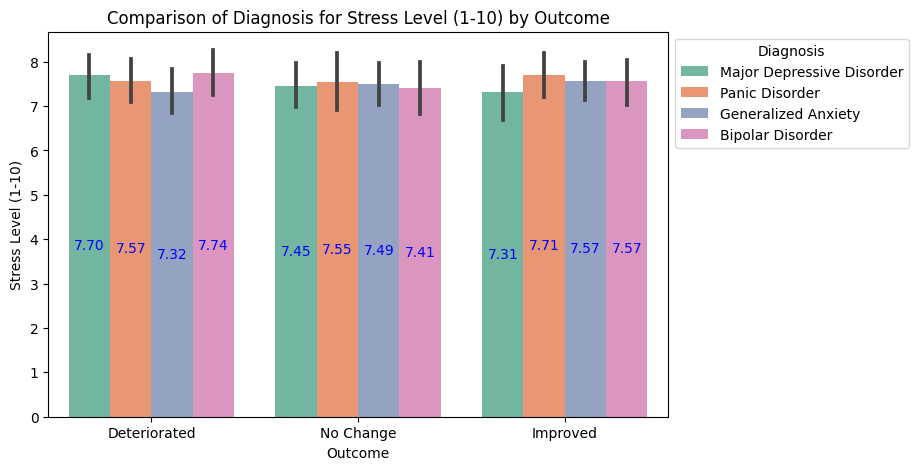

         Outcome                  Diagnosis  Treatment Progress (1-10)
0   Deteriorated           Bipolar Disorder                   6.847826
1   Deteriorated        Generalized Anxiety                   7.081081
2   Deteriorated  Major Depressive Disorder                   7.431818
3   Deteriorated             Panic Disorder                   7.522727
4       Improved           Bipolar Disorder                   7.500000
5       Improved        Generalized Anxiety                   7.452830
6       Improved  Major Depressive Disorder                   7.531250
7       Improved             Panic Disorder                   7.634146
8      No Change           Bipolar Disorder                   7.352941
9      No Change        Generalized Anxiety                   7.466667
10     No Change  Major Depressive Disorder                   7.673469
11     No Change             Panic Disorder                   7.806452


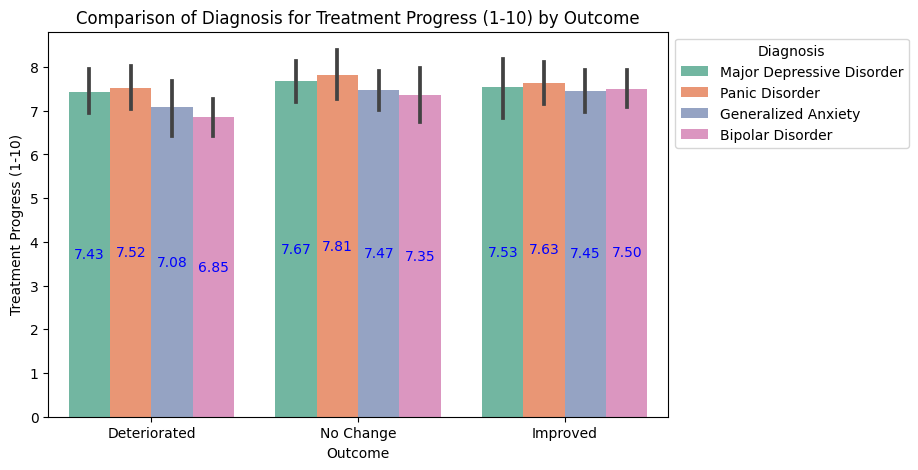

In [13]:
# Comparison of Diagnosis for Features by Outcome
def cat_summary(dataframe, col_name, plot=False):
    print(dataframe.groupby(['Outcome','Diagnosis'])[[col_name]].mean().reset_index())

    if plot:
        fig, ax = plt.subplots(figsize=(8, 5))
        df_melted = dataframe.melt(id_vars=['Outcome','Diagnosis'], value_vars=[col_name], 
                           var_name='Feature', value_name='Measurement')
        sns.barplot(x='Outcome', y='Measurement', hue='Diagnosis', data=df_melted, palette='Set2')
        plt.title('Comparison of Diagnosis for ' + col_name + ' by Outcome')
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), title= "Diagnosis")
        ax.bar_label(ax.containers[0], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        ax.bar_label(ax.containers[1], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        ax.bar_label(ax.containers[2], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        ax.bar_label(ax.containers[3], fmt='%0.2f', rotation = 0, fontsize = 10, label_type = 'center', color = 'blue')
        plt.xlabel('Outcome')
        plt.ylabel(col_name)
        plt.show(block=True)
for col in cols:
    cat_summary(df, col, True)

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#6495ED;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Now let's check the number of patients according to the features.</div>

In [14]:
columns = ['Gender', 'Diagnosis', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Sleep Quality (1-10)',
       'Physical Activity (hrs/week)', 'Medication', 'Therapy Type',
       'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Treatment Progress (1-10)',
       'AI-Detected Emotional State', 'Adherence to Treatment (%)']

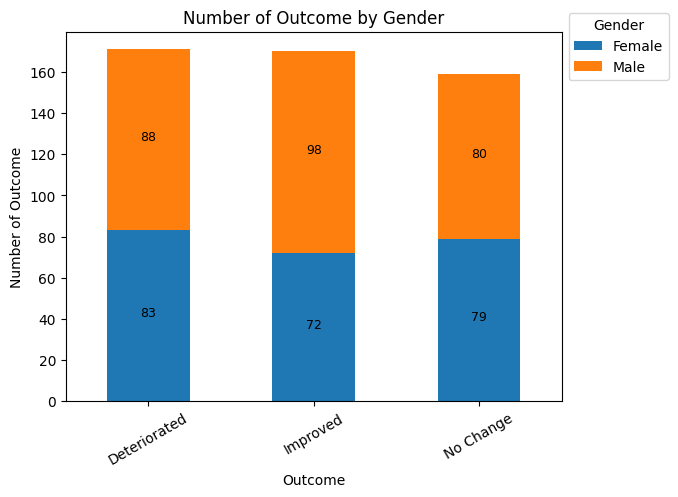

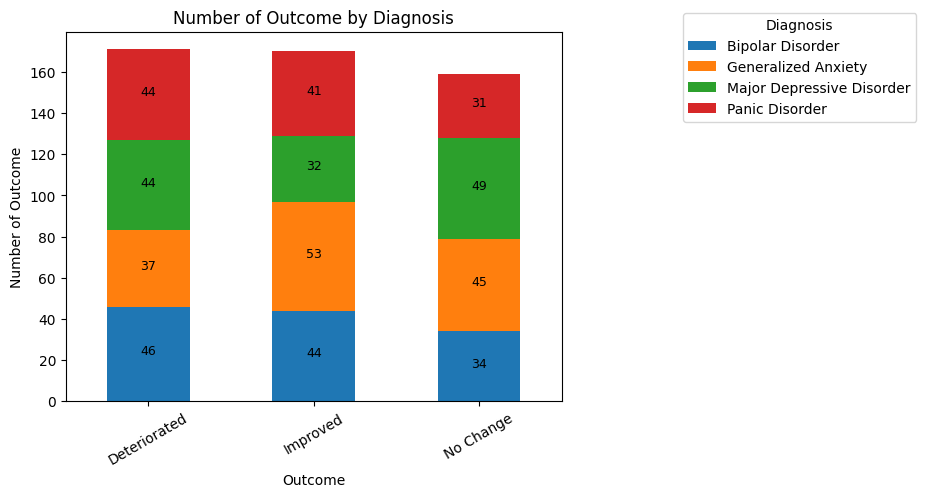

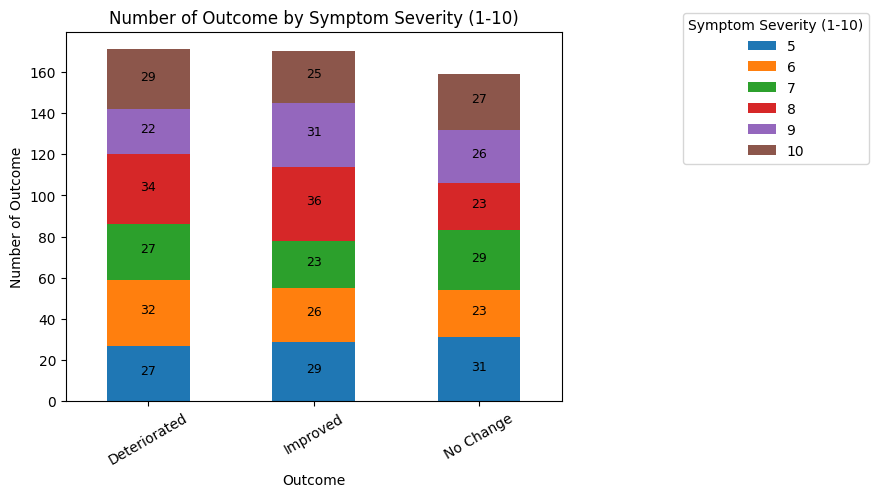

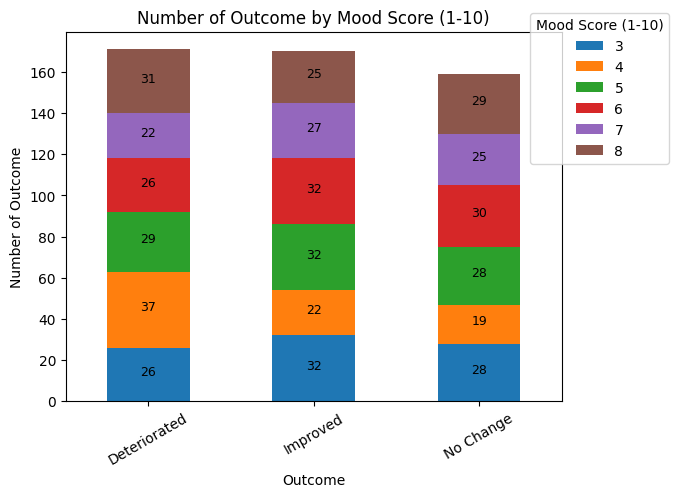

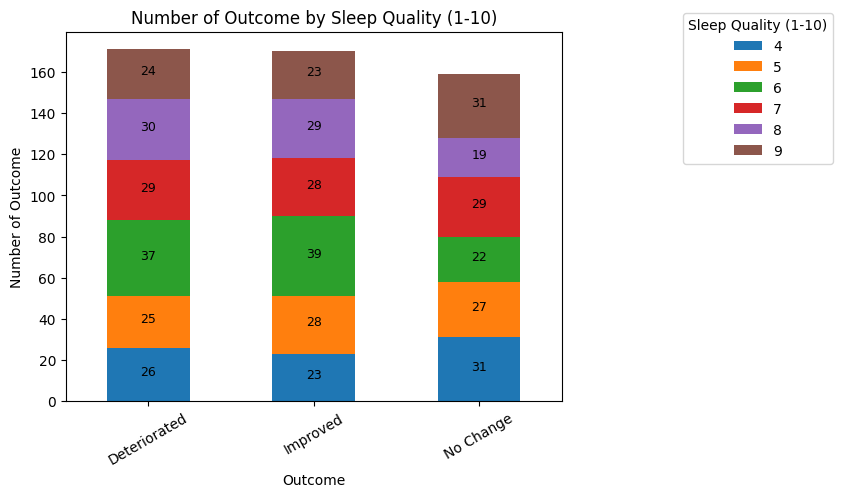

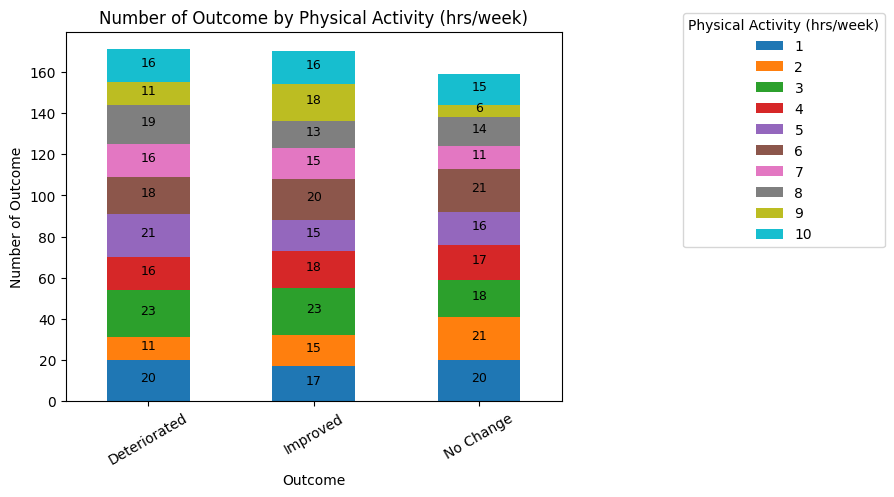

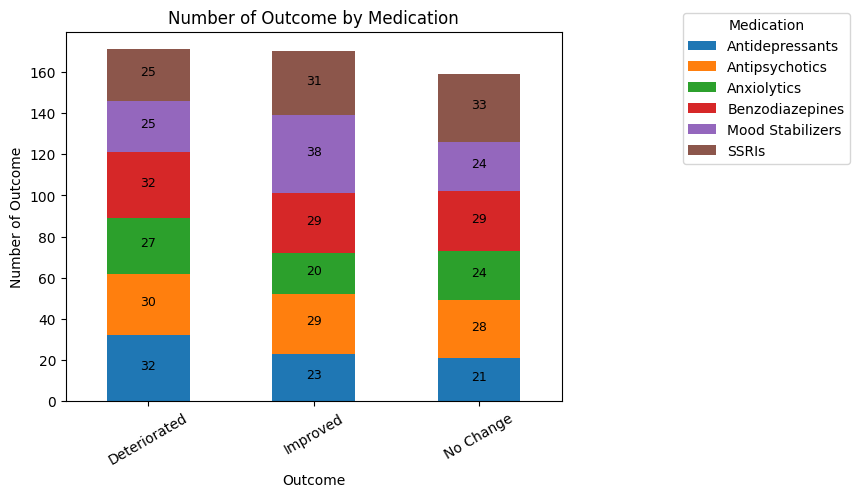

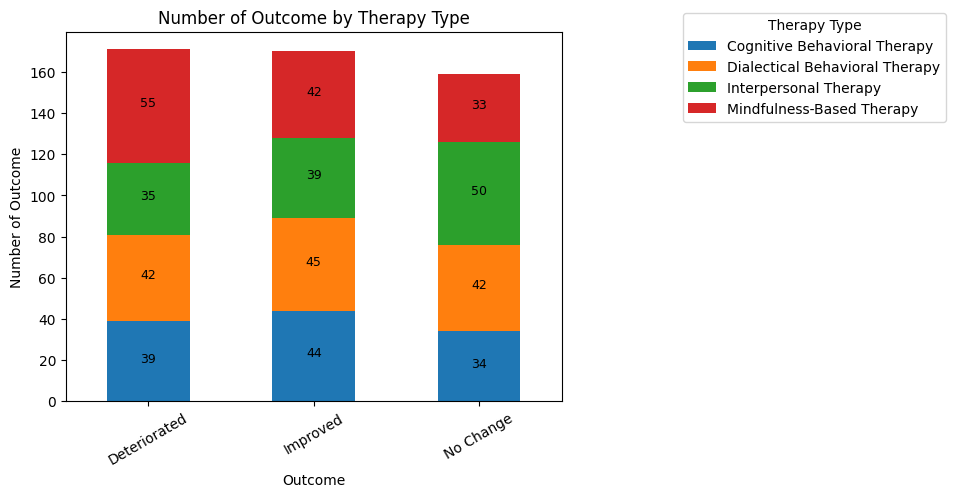

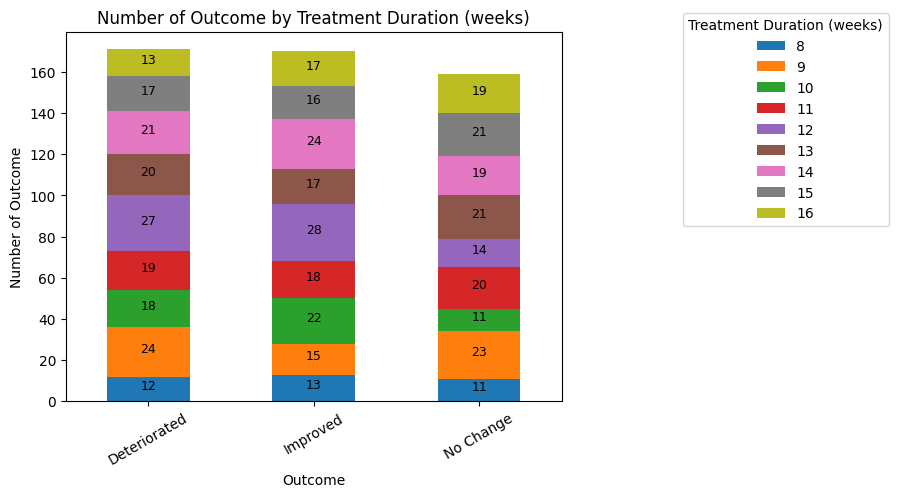

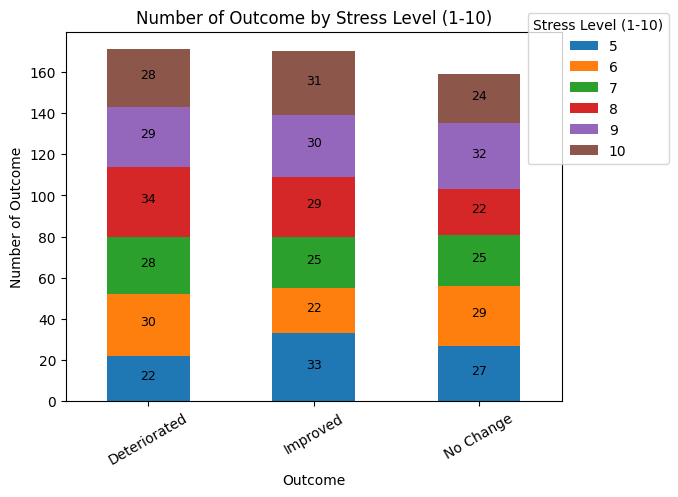

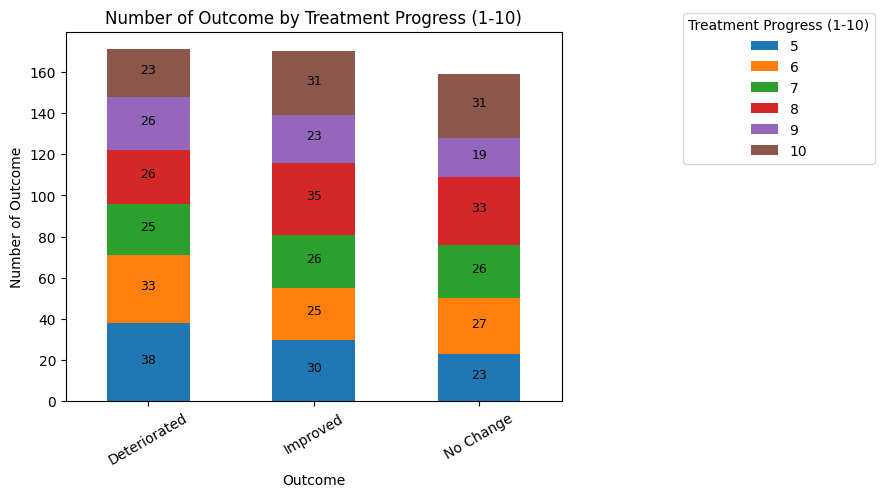

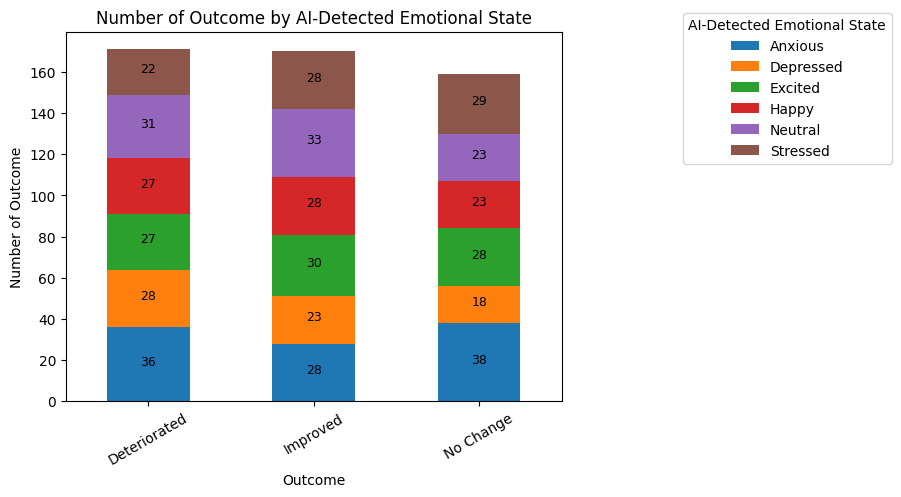

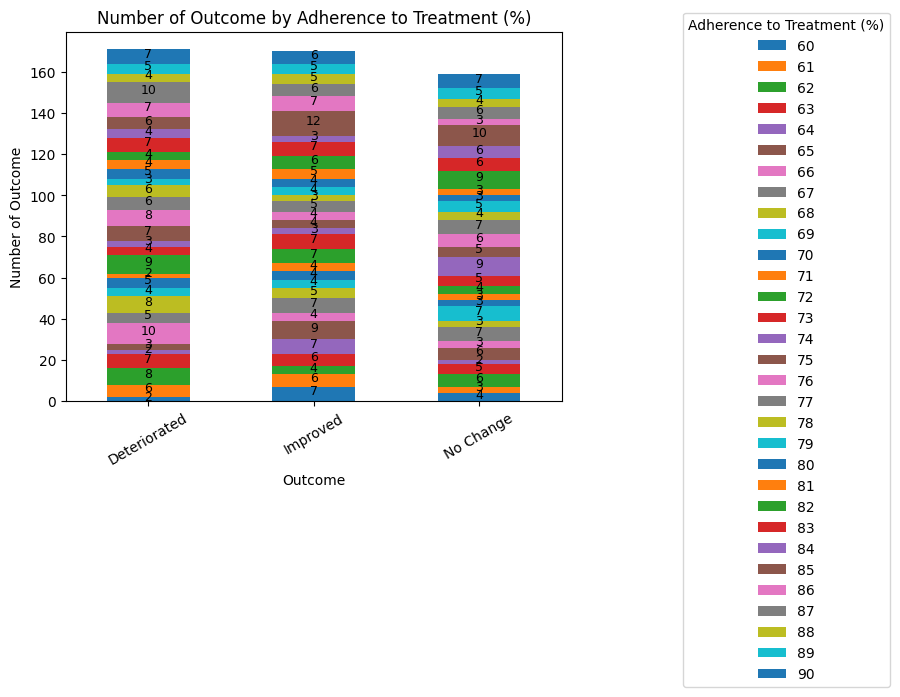

In [15]:
for i in columns:

    ax1 = df.groupby(['Outcome', i])['Age'].count().unstack().plot(kind='bar',
                                                                          stacked=True,
                                                                         )

    for container in ax1.containers:
        ax1.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='black', padding=2)

    plt.title('Number of Outcome by ' + i )
    plt.xlabel('Outcome')
    plt.ylabel('Number of Outcome')
    plt.xticks(rotation= 30)
    plt.legend(title=i, bbox_to_anchor= (1.23,1.07))

    plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#6495ED;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>Now let's check features by Outcome.</div>

In [16]:
# Features Histogram vs Target
for col in df.columns:
    plt = px.histogram(df, x = col, color ="Outcome", title=col + ' vs Outcome')
    plt.show()

## <b><div style='padding:15px;background-color:#6495ED;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, consider upvoting it. Thank you very much.</div></b>